# Import data

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 200
data = pd.read_csv("cleaned.csv", encoding="utf-8")
data.head(5)

,age,height_cm,weight_kg,body_type,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,chip_shot_trait,chipped_penalty_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb
0,32,185.0,80.0,1,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,3,1,0,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30,170.0,72.0,1,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,2,2,1,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,25,175.0,68.0,1,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,3,2,0,75,89,62,81,83,96,81,84,75,95,94,90,96,88,82,80,61,78,53,77,56,36,90,80,81,92,21,24,33,84.0,89.0,88.0,88.0,79.0,87.0,59.0,46.0,59.0,64.0,84.0,89.0,88.0,88.0,79.0,87.0,59.0,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,182.0,86.0,2,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,3,2,0,77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,89,80,86,78,41,92,84,85,83,30,45,38,88.0,87.0,88.0,87.0,80.0,85.0,65.0,58.0,64.0,68.0,88.0,87.0,88.0,87.0,80.0,85.0,65.0,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,28,185.0,79.0,2,92000000.

# Analyze

NOTE: It takes too long to train model for such an extensive dataset so we build regression model using only the first 20 highest correlation features.

In [2]:
features = data.corr()['eur_wage'].sort_values(ascending = False)[:21]
features = features.drop('eur_wage')
features = features.to_frame().index.tolist()
features

['eur_value',
 'eur_release_clause',
 'international_reputation',
 'overall',
 'potential',
 'reactions',
 'composure',
 'lcm',
 'rcm',
 'cm',
 'ball_control',
 'ls',
 'st',
 'rs',
 'short_passing',
 'lm',
 'rm',
 'cam',
 'lam',
 'ram']

# Linear Regression

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data,test_size=0.2,random_state=42)

X_train = train_set.drop('eur_wage',axis=1)
X_train = X_train[features]
Y_train = train_set['eur_wage']
X_test = test_set.drop('eur_wage',axis=1)
X_test = X_test[features]
Y_test = test_set['eur_wage']

In [4]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
lin_reg_predictions = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(lin_reg_predictions, Y_test)
rms = np.sqrt(mse)
print('rms = ' + str(rms))
print('mean wage = ' + str(data['eur_wage'].mean()))

rms = 12026.2570374
mean wage = 11793.438805561264


The root mean square error of the predictions from the model is more than then mean value. Therefore, it is clearly that the linear regression is not sufficient enough to predict the salary. We will use other advanced technique to build the efficient model.

# Polynomial Regression

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
lin_reg.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
X_test_poly = poly_features.fit_transform(X_test)
predictions = lin_reg.predict(X_test_poly)

mse = mean_squared_error(predictions, Y_test)
rms = np.sqrt(mse)
print('rms = ' + str(rms))
print('mean wage = ' + str(data['eur_wage'].mean()))

rms = 12189.740043
mean wage = 11793.438805561264


The root mean square error of the predictions from the model is more than then mean value.

# Decision Tree

In [8]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [9]:
dec_tree_predictions = regressor.predict(X_test)

mse = mean_squared_error(dec_tree_predictions, Y_test)
rms = np.sqrt(mse)
print('rms = ' + str(rms))
print('mean wage = ' + str(data['eur_wage'].mean()))

rms = 13668.4097152
mean wage = 11793.438805561264


The root mean square error of the predictions from the model is more than then mean value.

# SVM

In [10]:
# from sklearn.svm import SVR
# import matplotlib.pyplot as plt

# X_test_2d = [[x] for x in X_test['eur_value']]
# X_train_2d = [[x] for x in X_train['eur_value']]
# # #############################################################################
# # Fit regression model
# svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
# svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=1e3, degree=2)
# Y_rbf = svr_rbf.fit(X_train_2d, Y_train).predict(X_test_2d)
# Y_lin = svr_lin.fit(X_train_2d, Y_train).predict(X_test_2d)
# Y_poly = svr_poly.fit(X_train_2d, Y_train).predict(X_test_2d)

# # #############################################################################
# # Look at the results
# lw = 2
# plt.scatter(X_train, Y, color='darkorange', label='data')
# plt.plot(X_train, Y_rbf, color='navy', lw=lw, label='RBF model')
# plt.plot(X_train, Y_lin, color='c', lw=lw, label='Linear model')
# plt.plot(X_train, Y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
# plt.xlabel('data')
# plt.ylabel('target')
# plt.title('Support Vector Regression')
# plt.legend()
# plt.show()

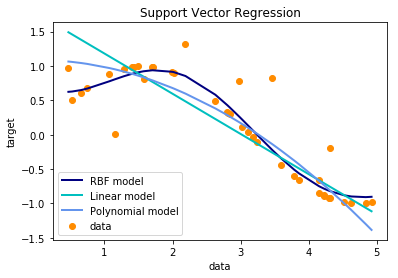

In [11]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
Y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
Y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
Y_rbf = svr_rbf.fit(X, Y).predict(X)
Y_lin = svr_lin.fit(X, Y).predict(X)
Y_poly = svr_poly.fit(X, Y).predict(X)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X, Y, color='darkorange', label='data')
plt.plot(X, Y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, Y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, Y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
